## Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

## Загрузка датасета Iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

## Вывод информации о датасете

In [3]:
print("Имена сортов:", iris.target_names)
df.head()
print("\nРазмер датасета:", df.shape)

Имена сортов: ['setosa' 'versicolor' 'virginica']

Размер датасета: (150, 5)


## Построение графиков

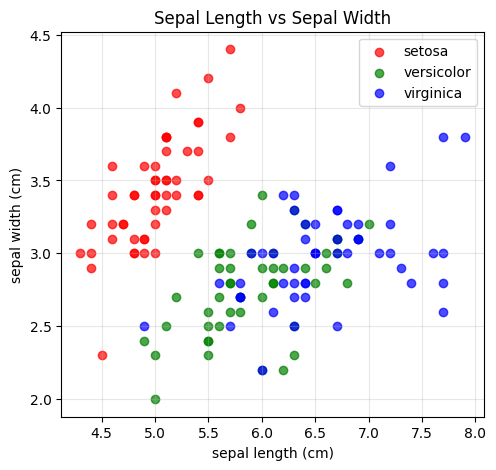

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
colors = ['red', 'green', 'blue']
for i in range(3):
    subset = df[df['target'] == i]
    plt.scatter(subset['sepal length (cm)'],
                subset['sepal width (cm)'],
                c=colors[i],
                label=iris.target_names[i],
                alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

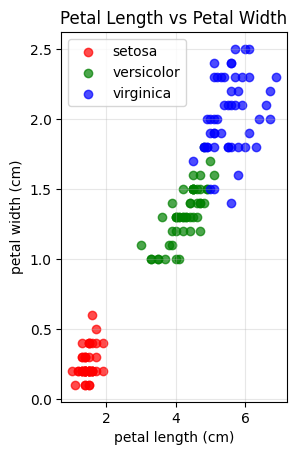

In [5]:
plt.subplot(1, 2, 2)
for i in range(3):
    subset = df[df['target'] == i]
    plt.scatter(subset['petal length (cm)'],
                subset['petal width (cm)'],
                c=colors[i],
                label=iris.target_names[i],
                alpha=0.7)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

## Отрисовка

In [6]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Pairplot для всего датасета

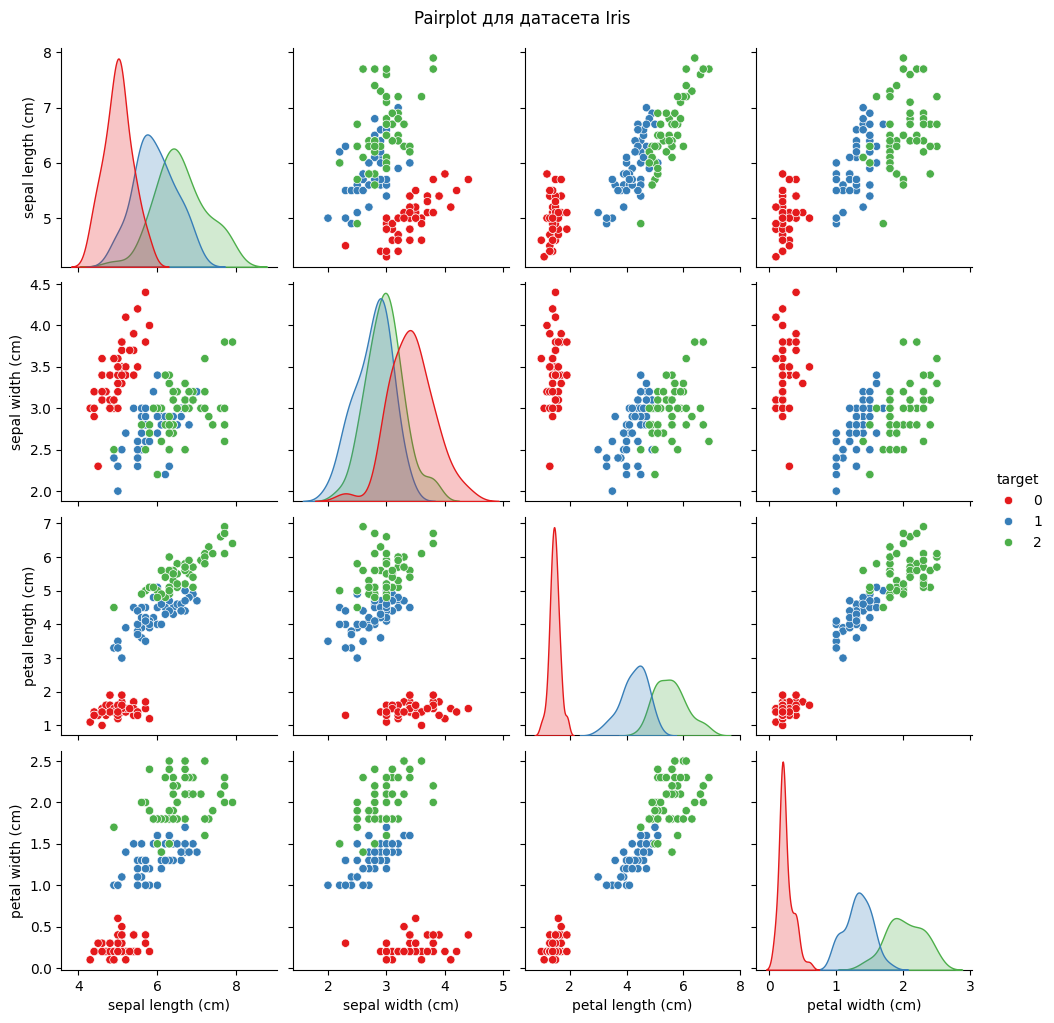

In [7]:
sns.pairplot(df, hue='target', palette='Set1',
    vars=[
        'sepal length (cm)', 'sepal width (cm)',
        'petal length (cm)', 'petal width (cm)'
    ]
)
plt.suptitle('Pairplot для датасета Iris', y=1.02)
plt.show()

## Подготовка двух датасетов

In [8]:
df_setosa_versicolor = df[df['target'].isin([0, 1])].copy()
df_versicolor_virginica = df[df['target'].isin([1, 2])].copy()

print(f"Setosa + Versicolor: {df_setosa_versicolor.shape}")
print(f"Versicolor + Virginica: {df_versicolor_virginica.shape}")

Setosa + Versicolor: (100, 5)
Versicolor + Virginica: (100, 5)


## Функция обучения модели

In [9]:
def train_and_evaluate_logistic_regression(dataframe, dataset_name):
    X = dataframe.drop('target', axis=1).values
    y = dataframe['target'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    print(f"Размер обучающей выборки: {X_train.shape}")
    print(f"Размер тестовой выборки: {X_test.shape}")

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    print(f"Точность на обучающей выборке: {train_score:.4f}")
    print(f"Точность на тестовой выборке: {test_score:.4f}")
    return clf, X_test, y_test, y_pred

## Прогон

In [10]:
clf1, X_test1, y_test1, y_pred1 = train_and_evaluate_logistic_regression(
    df_setosa_versicolor, "Setosa и Versicolor"
)

Размер обучающей выборки: (70, 4)
Размер тестовой выборки: (30, 4)
Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000


In [11]:
clf2, X_test2, y_test2, y_pred2 = train_and_evaluate_logistic_regression(
    df_versicolor_virginica, "Versicolor и Virginica"
)

Размер обучающей выборки: (70, 4)
Размер тестовой выборки: (30, 4)
Точность на обучающей выборке: 0.9571
Точность на тестовой выборке: 0.9333


In [12]:
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0,
    n_informative=2, random_state=1, n_clusters_per_class=1
)

## Отрисовка

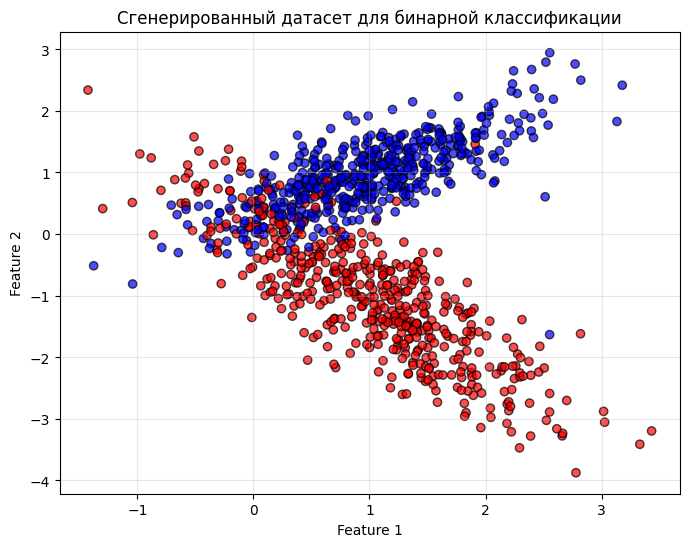

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Сгенерированный датасет для бинарной классификации')
plt.grid(True, alpha=0.3)
plt.show()

## Выводы

In [14]:
df_generated = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_generated['target'] = y
print(f"Размер сгенерированного датасета: {df_generated.shape}")

clf_generated, X_test_gen, y_test_gen, y_pred_gen = train_and_evaluate_logistic_regression(
    df_generated, "Сгенерированный датасет"
)

Размер сгенерированного датасета: (1000, 3)
Размер обучающей выборки: (700, 2)
Размер тестовой выборки: (300, 2)
Точность на обучающей выборке: 0.9029
Точность на тестовой выборке: 0.8900
